## Complex Data Structures with Trees##

![imports](http://res.cloudinary.com/dyd911kmh/image/upload/c_scale,f_auto,q_auto:best,w_700/v1512740202/Template_2_oxrskq.png)
[source](https://www.datacamp.com/community/tutorials/data-structures-python)

## Linear data structures ##
* Stacks
    * A stack is a container of objects that are inserted and removed according to the Last-In-First-Out (LIFO) concept.
    * Real world scenario: a stack of plates in the kitchen.
    * Comp. Sci. scenario: evaluating expressions and syntax parsing, scheduling algorithms/routines, etc.
  
* Queues
    * A queue a container of objects that are inserted and removed according to the First-In-First-Out (FIFO) concept.
    * Real world scenario: line at the supermarket checkout.
    

## Non-linear data structures ##
* Graphs
    * A graph are networks consisting of nodes, also known as vertices which may or may not be connected to each other. The lines or the paths that connect two nodes are called edges. Edges can have directions (directed graph) and/or having weights (weighted graph).
    * Real world scenario: Social networks, maps, flight schedule, etc.
    
  
<img src="https://s1.qwant.com/thumbr/0x380/9/d/b7d083f679394c250de73baa41844603e4ba087278c7fc7324d2050646b005/atsp1.png?u=http%3A%2F%2Fsupport.sas.com%2Fdocumentation%2Fcdl%2Fen%2Fornoaug%2F68159%2FHTML%2Fdefault%2Fimages%2Fatsp1.png&q=0&b=1&p=0&a=1" width=200>
    
* Trees
   * A tree is a collection of nodes (starting at a root node), where each node is a data structure consisting of a value and a list of references to nodes (the "children"), with the constrains that no references is duplicated, and none points to the root.
   
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Tree_%28computer_science%29.svg/1920px-Tree_%28computer_science%29.svg.png"  width=200>

## Use Python dictionary to implement a graph ##
<img src="https://s2.qwant.com/thumbr/0x0/d/b/affb770257dde1432da153dce8adb4cc1b4d05bd8c333e793533322d109ad1/A-simple-undirected-graph-used-to-illustrate-the-vertex-cover-and-reach-problems.png?u=https%3A%2F%2Fwww.researchgate.net%2Fprofile%2FDeepak_Puthal2%2Fpublication%2F275771321%2Ffigure%2Ffig1%2FAS%3A294524636155909%401447231553660%2FA-simple-undirected-graph-used-to-illustrate-the-vertex-cover-and-reach-problems.png&q=0&b=1&p=0&a=1" width=250>

In [9]:
graph = { "A" : ["B"],
          "B" : ["A", "C"],
          "C" : ["B", "D", "E"],
          "D" : ["C", "E", "F", "G"],
          "E" : ["C", "D", "F"],
          "F" : ["D", "E"],
          "G" : ["D"]
        }

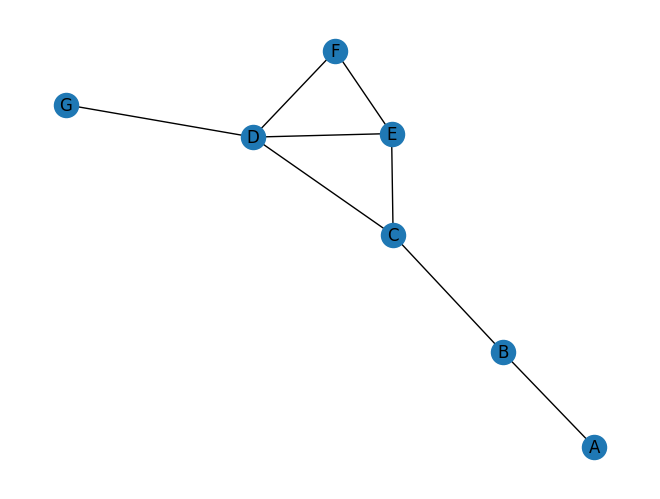

[('A', 'B'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F'), ('D', 'G'), ('E', 'F')]


In [18]:
#! pip install networkx matplotlib
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph(graph)
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True)
plt.show()
print(G.edges)

### CL10:
How many edges does the graph dictionary have?

A) 3
B) 4
C) 7
D) 8

## Processing Tree-like Data
In this hands-on exercise, we study means to store and manipulate information about taxonomic relationship among primates. We consider the following taxonomy showing a selection of primate taxa, where child taxa are indented underneath their parent:

* Primates
    - Haplorrhini
        - Strepsirrhini #Simiiformes
            - Hominoidea
                - Pan troglodytes
                - Pongo abelii
        - Tarsiiformes
            - Tarsius tarsier
    - Strepsirrhini
         - Lorisidae
             - Loris tardigradus
         - Lemuriformes
             - Allocebus trichotis
         - Lorisiformes
            - Galago alleni
            - Galago moholi
            

**The following dictionary represents the Child-to-Parent relations of this tree:**


In [26]:
# The dictionary tax_dict holds all the child-parent relations
# so that each key represents a child and the corresponding value
# represents the parent of that child
tax_dict = {
'Pan troglodytes' : 'Hominoidea',       'Pongo abelii' : 'Hominoidea',
'Hominoidea' :  'Strepsirrhini',          'Simiiformes' : 'Haplorrhini',#'Simiiformes' : 'Haplorrhini',
'Tarsius tarsier' : 'Tarsiiformes',     'Haplorrhini' : 'Primates',
'Tarsiiformes' : 'Haplorrhini',         'Loris tardigradus' : 'Lorisidae',
'Lorisidae' : 'Strepsirrhini',          'Strepsirrhini' : 'Primates',
'Allocebus trichotis' : 'Lemuriformes', 'Lemuriformes' : 'Strepsirrhini',
'Galago alleni' : 'Lorisiformes',       'Lorisiformes' : 'Strepsirrhini',
'Galago moholi' : 'Lorisiformes'
}

The following function is for finding exactly three parents for an organism. This function uses a dictionary in which the key is an organism whose value is the parent of that organism. Method dict.get(key)

In [28]:
# Function works with taxon that has exactly 3 ancestors
def get_3_ancestors(taxon):
    """Non-recursive function that returns three ancestors for the
       taxon passed as argument"""
    # get() returns the value for the given key in the dictionary
    first_parent = tax_dict.get(taxon)
    second_parent = tax_dict.get(first_parent)
    third_parent = tax_dict.get(second_parent)
    return[first_parent, second_parent, third_parent]

print(get_3_ancestors('Strepsirrhini'))

['Primates', None, None]


In [15]:
def get_all_ancestors(taxon):
    ancestors = [] #contain all the ancestors result

    while taxon in tax_dict: #for, while
        parent = tax_dict.get(taxon)
        # print("Parent: " + parent)
        ancestors.append(parent)
        taxon = parent #changes the taxon to parent

    return ancestors

print(get_all_ancestors('Hominoidea'))

['Simiiformes', 'Haplorrhini', 'Primates']


**Another way to representing the tree above is to create a data structure to show the Parent-to-Child relations of this tree:**
Here we use a dictionary where the key is the parent and the value is a list of all its children: parent -> [children]

In [16]:
# The dictionary new_tax_dict holds all parent child relations
#   so that each key represents a parent and its value is
#   a list of all children of that parent

# For example: 'Primates' is a parent that is stored as the key
#   and 'Haplorrhini' and 'Strepsirrhini' are the corresponding
#   children stored in a list that is the value of the key 'Primates'
new_tax_dict = {
    'Primates': ['Haplorrhini', 'Strepsirrhini'],
    'Haplorrhini': ['Tarsiiformes', 'Simiiformes'],
    'Tarsiiformes': ['Tarsius tarsier'],
    'Simiiformes': ['Hominoidea'],
    'Hominoidea': ['Pongo abelii', 'Pan troglodytes'],
    'Strepsirrhini': ['Lorisidae', 'Lemuriformes', 'Lorisiformes'],
    'Lorisidae': ['Loris tardigradus'],
    'Lemuriformes': ['Allocebus trichotis'],
    'Lorisiformes': ['Galago alleni','Galago moholi']

}

The following is an iterative function that returns a list of all the children and grandchildren of the taxon which is given as the argument. Run the cell below. Uncomment the print statements to see how a stack data structure works in finding all the children.

In [29]:
def get_children(taxon):
    children = [] #result -- the children

    stack = [taxon] # list for the stack to go through
    #the only information/item I have is taxon so I am adding that to a stack
    print ("First stack: " + str(stack))
    print()

    while len(stack) != 0:
        current_taxon = stack.pop() #remove the last item that I added or the parent I want to look at
        print("Parent or Child that was Popped: " + current_taxon)

        #looks all the children that are from the current_taxon or parent
        #if there is no child, then it returns an empty list
        current_taxon_children = new_tax_dict.get(current_taxon, [])
        print("Child(ren) of the Parent: " + str(current_taxon_children))

        #the reason we are extending is because we need to find all the children for the children
        stack.extend (current_taxon_children)
        print("Stack: " + str(stack))

        #append the parent to the children result
        children.append(current_taxon)
        print("Children: " + str(children))

        print()

    return (str(children[1:]))


print(get_children('Strepsirrhini'))

First stack: ['Strepsirrhini']

Parent or Child that was Popped: Strepsirrhini
Child(ren) of the Parent: ['Lorisidae', 'Lemuriformes', 'Lorisiformes']
Stack: ['Lorisidae', 'Lemuriformes', 'Lorisiformes']
Children: ['Strepsirrhini']

Parent or Child that was Popped: Lorisiformes
Child(ren) of the Parent: ['Galago alleni', 'Galago moholi']
Stack: ['Lorisidae', 'Lemuriformes', 'Galago alleni', 'Galago moholi']
Children: ['Strepsirrhini', 'Lorisiformes']

Parent or Child that was Popped: Galago moholi
Child(ren) of the Parent: []
Stack: ['Lorisidae', 'Lemuriformes', 'Galago alleni']
Children: ['Strepsirrhini', 'Lorisiformes', 'Galago moholi']

Parent or Child that was Popped: Galago alleni
Child(ren) of the Parent: []
Stack: ['Lorisidae', 'Lemuriformes']
Children: ['Strepsirrhini', 'Lorisiformes', 'Galago moholi', 'Galago alleni']

Parent or Child that was Popped: Lemuriformes
Child(ren) of the Parent: ['Allocebus trichotis']
Stack: ['Lorisidae', 'Allocebus trichotis']
Children: ['Strepsir

In [ ]:
def get_children(taxon):
    children = [] #result -- the children

    queue = [taxon] # list for the stack to go through
    #the only information/item I have is taxon so I am adding that to a stack
    print ("First queue: " + str(queue))
    print()

    while len(queue) != 0:
        current_taxon = queue.pop(0) #remove the last item that I added or the parent I want to look at
        print("Parent or Child that was Popped: " + current_taxon)

        #looks all the children that are from the current_taxon or parent
        #if there is no child, then it returns an empty list
        current_taxon_children = new_tax_dict.get(current_taxon, [])
        print("Child(ren) of the Parent: " + str(current_taxon_children))

        #the reason we are extending is because we need to find all the children for the children
        queue.extend (current_taxon_children)
        print("Queue: " + str(queue))

        #append the parent to the children result
        children.append(current_taxon)
        print("Children: " + str(children))

        print()

    return (str(children[1:]))


print(get_children('Strepsirrhini'))

First queue: ['Strepsirrhini']

Parent or Child that was Popped: Strepsirrhini
Child(ren) of the Parent: ['Lorisidae', 'Lemuriformes', 'Lorisiformes']
Queue: ['Lorisidae', 'Lemuriformes', 'Lorisiformes']
Children: ['Strepsirrhini']

Parent or Child that was Popped: Lorisidae
Child(ren) of the Parent: ['Loris tardigradus']
Queue: ['Lemuriformes', 'Lorisiformes', 'Loris tardigradus']
Children: ['Strepsirrhini', 'Lorisidae']

Parent or Child that was Popped: Lemuriformes
Child(ren) of the Parent: ['Allocebus trichotis']
Queue: ['Lorisiformes', 'Loris tardigradus', 'Allocebus trichotis']
Children: ['Strepsirrhini', 'Lorisidae', 'Lemuriformes']

Parent or Child that was Popped: Lorisiformes
Child(ren) of the Parent: ['Galago alleni', 'Galago moholi']
Queue: ['Loris tardigradus', 'Allocebus trichotis', 'Galago alleni', 'Galago moholi']
Children: ['Strepsirrhini', 'Lorisidae', 'Lemuriformes', 'Lorisiformes']

Parent or Child that was Popped: Loris tardigradus
Child(ren) of the Parent: []
Queu